# Introdução

## Dicionário dos dados

[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

##Analise dos dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/Dados_totais.csv')
dados_generos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/data_by_genres.csv')
dados_anos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/data_by_year.csv')

In [ ]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [ ]:
dados.shape
#ha 20311 musicas

(20311, 19)

In [ ]:
dados['year'].unique()
#Ha musicas de 2000 a 2020

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#Retirando as colunas key, mode e explicit
dados=dados.drop(['explicit','key','mode'], axis='columns')

In [ ]:
dados.isnull().sum() #nao há valores iguais a zero no dataset

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
dados.isna().sum() #nao há valores iguais a NaN no dataset

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
#dados_generos mostra os generos de cada musica com suas respectivas caracteristicas medias
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [ ]:
dados_generos = dados_generos.drop(['key','mode'], axis='columns') #Retirando colunas sem sentido

In [ ]:
dados_generos.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  
0   27.833333  
1   52.500000

In [ ]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
#dados_anos mostras as caracteristicas das musicas de cada ano desde 1921
dados_anos.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [ ]:
dados_anos = dados_anos.drop(['key', 'mode'], axis='columns') #Retirando colunas sem sentido
dados_anos

year  acousticness  danceability    duration_ms    energy  \
0   1921      0.886896      0.418597  260537.166667  0.231815   
1   1922      0.938592      0.482042  165469.746479  0.237815   
2   1923      0.957247      0.577341  177942.362162  0.262406   
3   1924      0.940200      0.549894  191046.707627  0.344347   
4   1925      0.962607      0.573863  184986.924460  0.278594   
..   ...           ...           ...            ...       ...   
95  2016      0.284171      0.600202  221396.510295  0.592855   
96  2017      0.286099      0.612217  211115.696787  0.590421   
97  2018      0.267633      0.663500  206001.007133  0.602435   
98  2019      0.278299      0.644814  201024.788096  0.593224   
99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0           0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1           0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2           0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3           0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4           0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   
..               ...       ...        ...          ...         ...       ...   
95          0.093984  0.181170  -8.061056     0.104313  118.652630  0.431532   
96          0.097091  0.191713  -8.312630     0.110536  117.202740  0.416476   
97          0.054217  0.176326  -7.168785     0.127176  121.922308  0.447921   
98          0.077640  0.172616  -7.722192     0.121043  120.235644  0.458818   
99          0.016376  0.178535  -6.595067     0.141384  124.283129  0.501048   

    popularity  
0     0.653333  
1     0.140845  
2     5.389189  
3     0.661017  
4     2.604317  
..         ...  
95   59.647190  
96   63.263554  
97   63.296243  
98   65.256542  
99   64.301970  

[100 rows x 12 columns]

In [ ]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [ ]:
#'dados' possuem apenas musicas dos anos 2000 em diante, porem 'dados_anos' vai desde 1921
dados_anos = dados_anos[dados_anos['year'] >= 2000] 
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados_anos.reset_index(drop= True,inplace = True) #resetando o indice

In [ ]:
dados_anos.head()

year  acousticness  danceability    duration_ms    energy  \
0  2000      0.289323      0.590918  242724.642638  0.625413   
1  2001      0.286842      0.583318  240307.796010  0.626986   
2  2002      0.282624      0.576160  239503.283000  0.641270   
3  2003      0.256471      0.575763  244670.575230  0.660165   
4  2004      0.280559      0.567680  237378.708037  0.648868   

   instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3          0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4          0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   

   popularity  
0   46.684049  
1   48.750125  
2   48.655500  
3   48.626407  
4   49.273143

##Análise gráfica

In [ ]:
import plotly.express as px #importando a biblioteca grafica
#Essa biblioteca permite criar graficos dinamicos

In [ ]:
#Grafico continuo do ano em relação ao valor de loudness
fig = px.line(dados_anos, 
              x='year', 
              y='loudness', 
              markers=True, #Coloca pontinhos no grafico 
              title='Variação de loudness com os anos')
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
def criaGraficoTraco(fig, feature):
  fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos[feature], name=feature))
  #obs: usei o go.Scatter apenas para colocar os pontos de modo que go.add_trace apenas ligou os pontos por uma linha

In [ ]:
fig = go.Figure()
criaGraficoTraco(fig, 'acousticness')
criaGraficoTraco(fig, 'danceability')
criaGraficoTraco(fig, 'energy')
criaGraficoTraco(fig, 'valence')
criaGraficoTraco(fig, 'instrumentalness')
criaGraficoTraco(fig, 'speechiness')
criaGraficoTraco(fig, 'liveness')

fig.show()

In [ ]:
#criando matrix correlação dos 'dados'
fig = px.imshow(dados.corr(), text_auto=True) #essa função plota uma imagem
fig.show()

# Clusterização por gênero

## PCA e SdandartScaler

In [ ]:
dados_generos['genres'].value_counts().sum() #cada linha é um genero diferente

2973

Como temos uma grande variedade de gêneros, 2973 ao todo, e todos estão em formato de string que não é aceito por modelos de machine learning, precisamos aplicar algum tipo de encoding, que é basicamente fazer com que essas palavras virem valores numéricos e façam sentido para a nossa máquina. O modo que vamos fazer é utilizando o **get_dummies**, que é bem semelhante ao OneHotEncoder, mas muito mais fácil de aplicar já que podemos utilizar direto da biblioteca do Pandas. 


In [ ]:
#ao inves de usar get_dummies, criei um novo dataframe sem os rotulos dos generos
dados_generos1 = dados_generos.drop('genres', axis='columns')
dados_generos1 #'dados_generos' sem as colunas generos

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

Agora vamos utilizar vários conceitos em um processo de pipeline, então a primeira coisa que vamos fazer é importar o método **Pipeline** do [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela. 

Neste ponto, onde fizemos os nossos dummies anteriormente com os gêneros, precisamos reduzir a dimensionalidade da tabela que está com milhares de colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que tem uma amplitude maior, como por exemplo o **loudness** em relação às outras variáveis que compõe a música. 

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o [**StandardScaler**](https://scikit-learn.org/stable/modules/preprocessing.html) para trazer essa normalização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
SEED=1224
np.random.seed(SEED)
#pipeline é uma sequencia de passos, um apos o outro (pipeline automatiza processos)
#no sklearn uma pipeline é uma sequencia de transformaçoes uma apos a outra com um estimador no final

#Passo uma lista com modulos/passos que quero fazer
#OBS: os parametros no formato string abaixo são apenas nomes que eu escolho 
pca_pipeline = Pipeline([
                          ('scaler', StandardScaler()), #primeiro os dados são escalados
                          ('PCA', PCA(n_components=2, random_state=SEED))#depois é feito um PCA nos dados (reduz os dados para 2 dimençoes)
                        ])

In [ ]:
#Usando a pipleine para escalar os dados e fazer o PCA...
dados_generos_transformados = pca_pipeline.fit_transform(dados_generos1)
dados_generos_transformados = pd.DataFrame(dados_generos_transformados, columns=['x', 'y'])


In [ ]:
dados_generos_transformados

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

##K-Means

K-means ainda não consegue resolver problemas com escalas diferentes (sem normalização sem ou padronização) e também não consegue agrupar com precisão dados de alta dimensionalidade
* Para a primeira parte, em relação às escalas, é necessário que todos estejam na mesma escala de [0,1], como fizemos anteriormente com o StandadScaler, caso contrário, ele colocará maior peso em variáveis que têm variâncias maiores e esses recursos terão maior influência na forma final do cluster.
* Em relação à alta dimensionalidade, o algoritmo usa a distância euclidiana para determinar a associação de agrupamento, porém, quando temos uma alta dimensionalidade, pares de pontos começarão a ter distâncias muito semelhantes e não conseguiremos obter agrupamentos significativos. Para reduzir a quantidade de dados podemos utilizar a técnica chamada Análise de Componentes Principais (PCA).

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

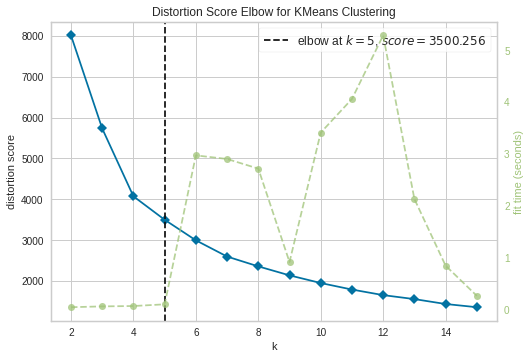

In [ ]:
cotovelo = KElbowVisualizer(KMeans(), k=15)
cotovelo.fit(dados_generos_transformados)
cotovelo.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=5, random_state=SEED, verbose= False)

kmeans_pca.fit(dados_generos_transformados) #treino o KMeans
dados_generos['cluster_pca'] = kmeans_pca.predict(dados_generos_transformados) #Faço predict dos dados_generos_transformados
dados_generos_transformados['cluster_pca'] = kmeans_pca.predict(dados_generos_transformados)

In [ ]:
dados_generos.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  cluster_pca  
0   27.833333            3  
1   52.500000            3

In [ ]:
dados_generos_transformados['generos'] = dados_generos['genres']
dados_generos_transformados.head()

x         y  cluster_pca                 generos
0  5.910268 -0.011146            3  21st century classical
1  2.787093  4.498483            3                   432hz
2 -0.757538 -1.258495            4                   8-bit
3  1.020521 -0.931690            1                      []
4  0.753911 -0.999861            1              a cappella

##Plotando a clustering

In [ ]:
px.scatter(
    dados_generos_transformados, 
    x='x', 
    y='y', 
    color='cluster_pca',#coluna que representa os grupos
    hover_data=['x','y','generos'] #valores escritos em cada ponto
)

In [ ]:
#obs: pca_pipeline[1] representa apenas o PCA e posso fazer operaçoes apenas nele

#explained_variance_ratio_ mostra a porcentagem das features que estão sendo resumidas por cada coluna
pca_pipeline[1].explained_variance_ratio_
#a coluna x consegue resumir 35% das features
#a coluna y consegue resumir 15% das features

array([0.34986105, 0.14284565])

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()
#49% das features são resumidas pelo PCA

0.4927066994726641

In [ ]:
#explained_variance_ mostra quantas features estão sendo resumidas por cada coluna
pca_pipeline[1].explained_variance_

array([3.84976644, 1.57183087])

In [ ]:
pca_pipeline[1].explained_variance_.sum()
#o PCA consegue resumir 5 features (menos da metade)

5.421597305805697

#Clusterização por música

##Redução de dimensionalidade com PCA

In [ ]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [ ]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder #é um get_dummies mais sofisticado, ou seja pode ser usado em pipelines

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray() #matriz apenas com os dummies da coluna artists sem rotulos
dados2 = dados.drop('artists', axis='columns')
dummies = pd.DataFrame(
                        colunas_ohe,#dummies sem rotulos
                        columns = ohe.get_feature_names_out()#rotulos da matriz de dummies
                      )

dados_musicas_dummies= pd.concat([
                                  dados2,
                                  dummies
                                  ], axis='columns')

In [ ]:
dados_musicas_dummies.head(2)

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   
1    0.613  2000       0.14300         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness  ...  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   

  artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                    0             0              0                  0   
1                    0             0              0                  0   

  artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                 0                 0                           0   
1                 0                 0                           0   

   artists_fun.  artists_girl in red  artists_iann dior  
0             0                    0                  0  
1             0                    0                  0  

[2 rows x 890 columns]

In [ ]:
dados.shape

(20311, 16)

In [ ]:
dados_musicas_dummies.shape

(20311, 890)

In [ ]:
#Retirando variáveis categoricas


In [ ]:
from pandas.core.common import random_state

pca_pipeline = Pipeline([
              ('scaler', StandardScaler()), 
              ('PCA', PCA(
                            n_components = 0.7, #Como há 890 dimensoes então a taxa de aproveitamento será muito baixa, logo ao colocar 0.7 forço o aproveitamento a ser 70% nao se preocupando com o numero de features
                            random_state= SEED
                          )
              )
            ])

dados_musicas_dummies_transformado = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis='columns'))
dados_musicas_dummies_transformado = pd.DataFrame(dados_musicas_dummies_transformado)

In [ ]:
pca_pipeline[1].n_components_ #Retorna o numero de componentes apos o PCA

612

## Aplicação do cluster com K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_pca_pipeline = KMeans(n_clusters=50, random_state=SEED)
kmeans_pca_pipeline.fit(dados_musicas_dummies_transformado)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(dados_musicas_dummies_transformado)
dados_musicas_dummies_transformado['cluster_pca'] = kmeans_pca_pipeline.predict(dados_musicas_dummies_transformado)

In [ ]:
dados_musicas_dummies_transformado['artist'] = dados['artists']
dados_musicas_dummies_transformado['song'] = dados['artists_song']

In [ ]:
dados_musicas_dummies_transformado.head(2)

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   

            609           610           611  cluster_pca    artist  \
0 -2.448503e-12  5.916867e-12  3.121908e-12           41  Coldplay   
1  1.249715e-13 -1.457579e-12 -2.040535e-13           41   OutKast   

                    song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson  

[2 rows x 615 columns]

## Analisando o cluster

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum() #tem um aproveitamento de 70%

0.700000846318703

In [ ]:
pca_pipeline[1].explained_variance_.sum()#consegue resumir 620 features

620.9313218688691

In [ ]:
#As primeiras features de dados_musicas_dummies_transformado são as mais aproveitadas
print(pca_pipeline[1].explained_variance_[0])
print(pca_pipeline[1].explained_variance_[1])
print(pca_pipeline[1].explained_variance_[2])

3.862487271400161
2.5609476738159795
1.989699469166001


In [ ]:
#As primeiras colunas do PCA são as que mais explicam os dados
fig = px.scatter(dados_musicas_dummies_transformado, x=0, y=1, color='cluster_pca', hover_data=[0,1,'song'])
fig.update_traces(marker_size = 3)
fig.show()

In [ ]:
fig= px.scatter_3d(dados_musicas_dummies_transformado, x=1,y=2,z=3, color='cluster_pca', hover_data=['song'])
fig.update_traces(marker_size = 2)
fig.show()

# Sistemas de Recomendação

## Recomendação da música

In [ ]:
musica = 'Ed Sheeran - Shape of You'

In [ ]:
#pego o cluster da musica que estou procurando
cluster_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song']==musica]['cluster_pca'])[0]
cluster_musica

15

In [ ]:
#pego as musicas do mesmo cluster e as colunas 0 e 1
musicas_recomendadas = dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['cluster_pca']==cluster_musica][[0,1,'song']]
musicas_recomendadas

0         1                                         song
567    0.873583 -0.690517  Alejandro Fernández - Me Dediqué a Perderte
576    1.155518  0.412391                             Sia - Breathe Me
670   -0.632877 -0.632693            Chris Brown - Yo (Excuse Me Miss)
690   -0.430718 -0.784600  Chris Brown - Run It! (feat. Juelz Santana)
734   -0.407674 -0.391286                    Chris Brown - Say Goodbye
...         ...       ...                                          ...
20306  1.346699 -2.775889               Bazzi - I Don't Think I'm Okay
20307  1.269387 -2.444619           Bryson Tiller - Timeless Interlude
20308  0.781916 -1.164865                       Fleet Foxes - Sunblind
20309  0.002454 -3.056407               Gunna - NASTY GIRL / ON CAMERA
20310 -0.957008 -1.208016                            Eminem - Darkness

[6525 rows x 3 columns]

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
#calculando a distancia euclidiana xy da musica com as recomendadas
x_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song'] == musica][0])[0] #x da minha musica
y_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song'] == musica][1])[0] #y da minha musica

#calcula a distacia euclidiana do primeiro ponto com o primeiro ponto, do primeiro ponto com o segundo ponto, ... ,do primeiro ponto com o n-ezimo ponto
#calcula a distacia euclidiana do segundo ponto com o primeiro ponto, do segundo ponto com o segundo ponto, ... ,do segundo ponto com o n-ezimo ponto
#...

#retorna uma matriz com essas distancias
#funciona apenas para pontos (x,y)
distancias= euclidean_distances(
                      musicas_recomendadas[[0,1]], #matriz com pares de pontos (x,y)
                      [[x_musica, y_musica]] #matriz com 1 ponto (x,y)
                    )
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias

recomendadas =  musicas_recomendadas.sort_values(by='distancias', ascending=True).head(10)
recomendadas

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
17093 -0.792448 -2.974369                        Joyner Lucas - Will - Remix   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
17156 -0.846706 -2.863550              KYLE - What It Is (feat. Chris Brown)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
2826   13ZyrkCDmRz5xY3seuAWYk    0.005226  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
17093  6WI33r2QRxyxttn3KH0XkC    0.048920  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
17156  26rIWI1QTPClaOOI4Kbxhe    0.078662

## Biblioteca Spotipy

In [ ]:
!pip install urllib3 --upgrade 
!pip install requests --upgrade 
!pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [ ]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '48c4ba91558a4a67a1f57450776af96c',
        client_secret = '685f7c84bd14427db0c85f12e800e30e')

In [ ]:
#Autenticação do usuario
client_credentials_manager = SpotifyClientCredentials(client_id = '48c4ba91558a4a67a1f57450776af96c',client_secret = '685f7c84bd14427db0c85f12e800e30e')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Imagem do álbum

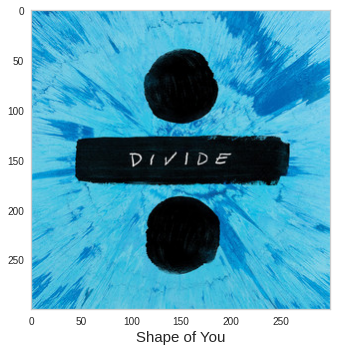

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

musica ='Ed Sheeran - Shape of You'
id = dados[dados['artists_song'] == musica]['id'].iloc[0] #seleciona o id da musica
track = sp.track(id) #pega a musica na API do spotify com suas infos
name = track['name'] #pega o nome da musica
url_imagem = track['album']['images'][1]['url'] #pego imagem com 300x300

#printa a imagem
image = io.imread(url_imagem) #le a imagem da url
plt.xlabel(name, fontsize =15)
plt.grid(False)

plt.imshow(image)

# Aula 5 - Recomendador

## Buscando os dados da playlist

In [ ]:
def recommended_id(playlist_id):
  url = []
  name = []
  tempo = []
  nome_artista = []

  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
    nome_artista.append(track['artists'][0]['name'])
    tempo.append(round(track['duration_ms']/60000, 2))

  return name, url, tempo, nome_artista

##Gerando as imagens da playlist

In [ ]:
def visualize_songs(name, url, tempo, nome_artista):

    plt.figure(figsize=(20,15))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        
        # O subplot do matplotlib é usado para que as imagens consigam ficar uma ao lado da outra, ou seja, para que as 10 capas de álbuns fiquem juntas lado a lado usando o subplot. 
        # Os parâmetros usados são para criar o número de colunas exibidas.
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível 
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(f"{nome_artista[i]}\n{name[i]}\n{tempo[i]}", fontsize = 12)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

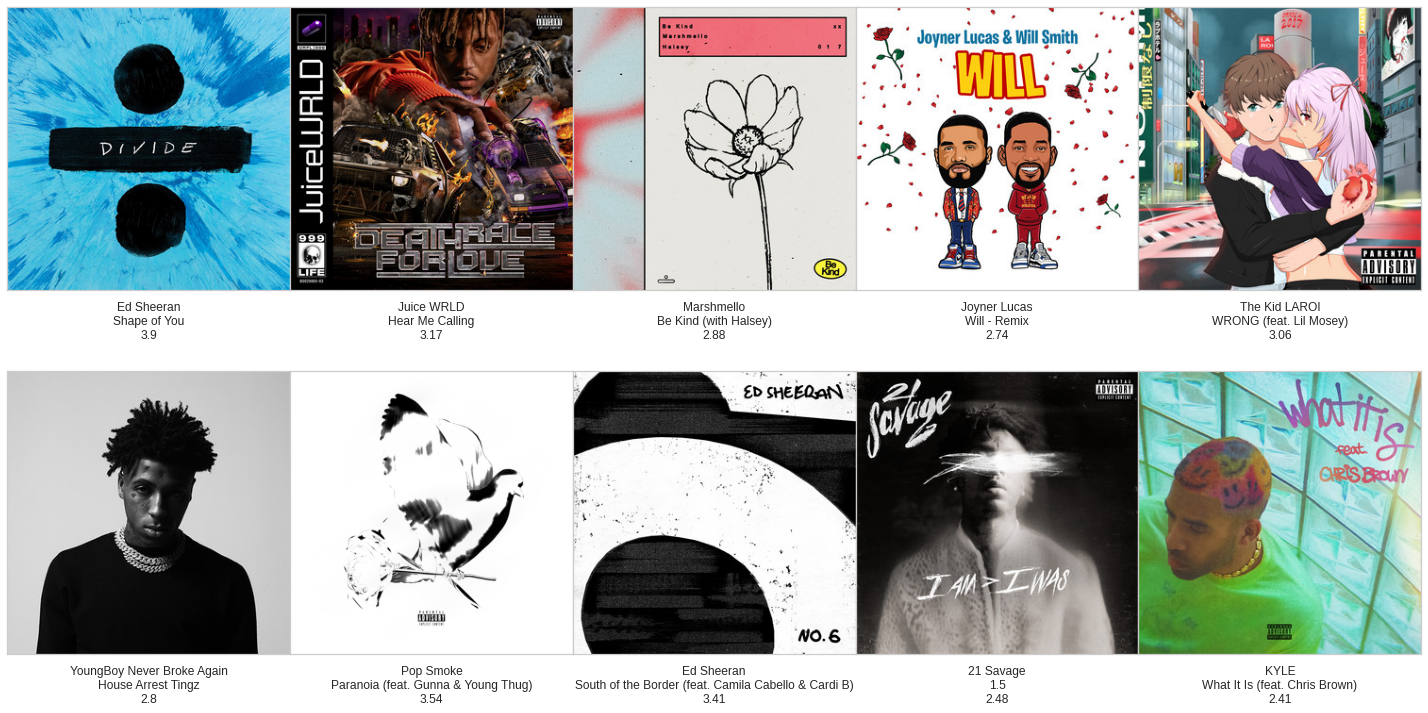

In [ ]:
name, url, tempo, nome_artista=recommended_id(recomendadas['id'])
visualize_songs(name, url, tempo,nome_artista)


## Fazendo uma função final

In [ ]:
def recomendador(musica):
  from sklearn.metrics.pairwise import euclidean_distances

  cluster_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song']==musica]['cluster_pca'])[0]
  musicas_recomendadas = dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['cluster_pca']==cluster_musica][[0,1,'song']]

  x_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song'] == musica][0])[0] 
  y_musica = list(dados_musicas_dummies_transformado[dados_musicas_dummies_transformado['song'] == musica][1])[0]

  distancias= euclidean_distances(
                        musicas_recomendadas[[0,1]], #matriz com pares de pontos (x,y)
                        [[x_musica, y_musica]] #matriz com 1 ponto (x,y)
                      )
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias

  recomendadas =  musicas_recomendadas.sort_values(by='distancias', ascending=True).head(10)

  name, url, tempo, nome_artista = recommended_id(recomendadas['id'])
  
  visualize_songs(name, url, tempo,nome_artista)

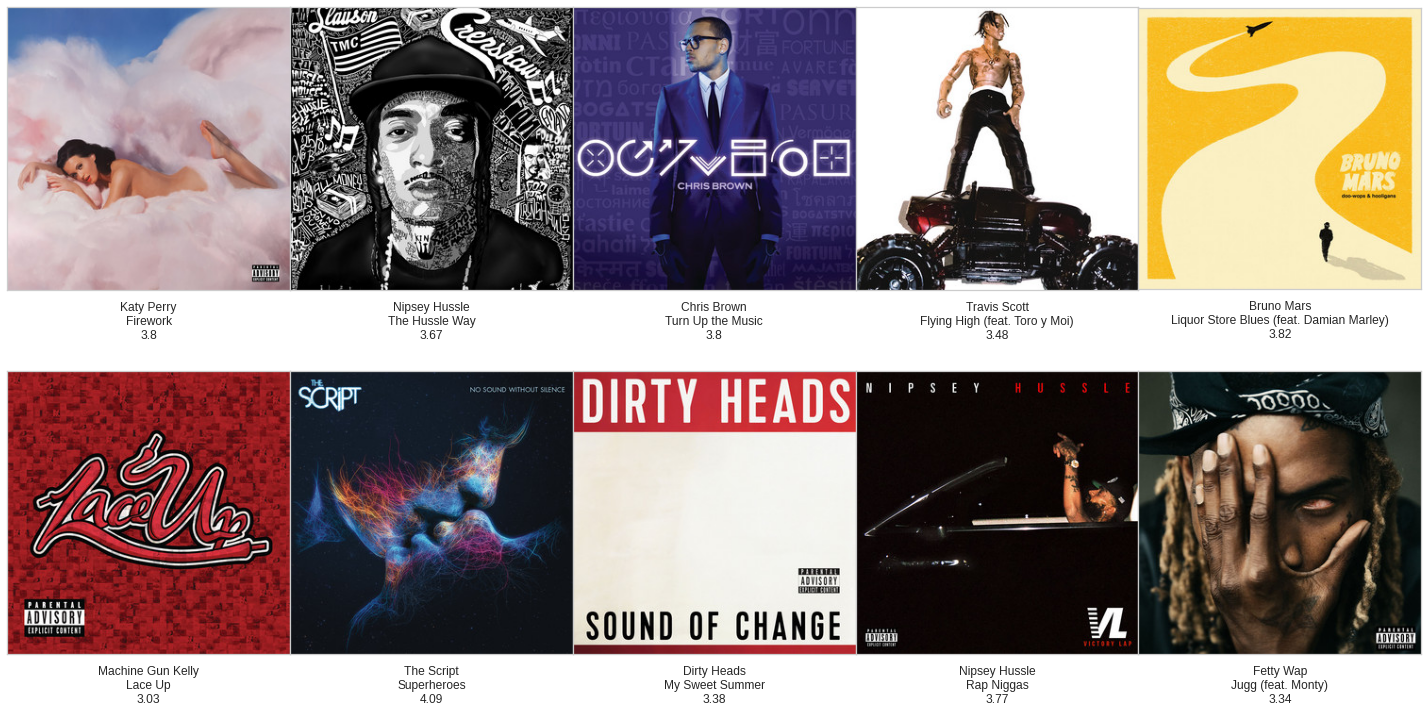

In [ ]:
recomendador('Katy Perry - Firework')

In [ ]:
dados[dados['artists']=='Katy Perry']

valence  year  acousticness     artists  danceability  duration_ms  \
1111     0.696  2008      0.002230  Katy Perry         0.699       179640   
1127     0.861  2008      0.000080  Katy Perry         0.706       220227   
1413     0.720  2010      0.001250  Katy Perry         0.652       230733   
1431     0.591  2010      0.016200  Katy Perry         0.719       227741   
1458     0.648  2010      0.141000  Katy Perry         0.638       227893   
1459     0.403  2010      0.003800  Katy Perry         0.788       234653   
1483     0.876  2010      0.000812  Katy Perry         0.691       227333   
1825     0.769  2012      0.000417  Katy Perry         0.678       216160   
1901     0.353  2013      0.003140  Katy Perry         0.645       215672   
1911     0.455  2013      0.004870  Katy Perry         0.554       223546   
3979     0.590  2008      0.001200  Katy Perry         0.524       199187   
4425     0.575  2012      0.074900  Katy Perry         0.514       220947   
4447     0.760  2012      0.018100  Katy Perry         0.620       229573   
4456     0.352  2012      0.697000  Katy Perry         0.714       259040   
4565     0.353  2013      0.002730  Katy Perry         0.432       228879   
4627     0.843  2013      0.087900  Katy Perry         0.719       215042   
5270     0.385  2019      0.194000  Katy Perry         0.770       223523   
6331     0.309  2008      0.001670  Katy Perry         0.431       246410   
7374     0.560  2018      0.128000  Katy Perry         0.774       182521   
7597     0.149  2020      0.083700  Katy Perry         0.639       173124   
9019     0.800  2013      0.020300  Katy Perry         0.690       204285   
9356     0.442  2016      0.046800  Katy Perry         0.553       203475   
11514    0.471  2017      0.081400  Katy Perry         0.562       237733   
15115    0.583  2017      0.018400  Katy Perry         0.838       242520   
16117    0.587  2008      0.040100  Katy Perry         0.647       217427   
16123    0.855  2008      0.010900  Katy Perry         0.617       198347   
16473    0.942  2012      0.056300  Katy Perry         0.825       231920   
19324    0.380  2008      0.000649  Katy Perry         0.573       176762   
20042    0.528  2017      0.131000  Katy Perry         0.800       227813   
20208    0.321  2020      0.043500  Katy Perry         0.639       198947   
20233    0.749  2020      0.023800  Katy Perry         0.783       166898   

       energy                      id  instrumentalness  liveness  loudness  \
1111    0.760  005lwxGU1tms6HGELIcUv9          0.000000    0.1320    -3.173   
1127    0.841  1y4eb6hmAvsqlDOl3fx9kk          0.000000    0.0688    -3.956   
1413    0.812  3avYqdwHKEq8beXbeWCKqJ          0.000030    0.6670    -3.797   
1431    0.798  5jzKL4BDMClWqRguW5qZvh          0.000002    0.1340    -4.582   
1458    0.832  4r6eNCsrZnQWJzzvFh4nlg          0.000000    0.1130    -5.039   
1459    0.753  6KOEK6SeCEZOQkLj5M1PxH          0.000000    0.1800    -3.710   
1483    0.795  6hkOqJ5mE093AQf2lbZnsG          0.000001    0.1560    -4.021   
1825    0.918  1nZzRJbFvCEct3uzu04ZoL          0.000000    0.0744    -4.630   
1901    0.585  5jrdCoLpJSvHHorevXBATy          0.000000    0.1650    -6.122   
1911    0.772  6F5c58TMEs1byxUstkzVeM          0.000007    0.3540    -4.821   
3979    0.878  6fvxos1qSHrIgOkKw4dhWS          0.000000    0.0980    -3.108   
4425    0.683  5JLv62qFIS1DR3zGEcApRt          0.000003    0.3920    -5.099   
4447    0.869  36ux3YuUsGTWPT8fXclS45          0.000000    0.3690    -5.252   
4456    0.434  5jx8tCxiO0uIbo2uNia23K          0.000000    0.0919   -11.542   
4565    0.725  009ImBOrIUlWgla8U05RAC          0.000000    0.2080    -4.862   
4627    0.674  2xLOMHjkOK8nzxJ4r6yOKR          0.000004    0.1120    -5.122   
5270    0.882  5PYQUBXc7NYeI1obMKSJK0          0.000000    0.3160    -4.792   
6331    0.803  3c9LVPh3MpeFoaAL5DBDK5          0.000000    0.3310    -4.459   
7374    0.608  02FaKXXL7KUtRc7K0k54tL    